# Bank Marketing Campaign Outcome Prediction
## Data Source
##### The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).
##### The full dataset is publicly downloadable from https://query.data.world/s/qojyxsfjjlfztmhqtpyze5y7lapmwk 
##### Source: 

#####   https://data.world/data-society/bank-marketing-data/workspace/project-summary?agentid=data-society&datasetid=bank-marketing-data

##### Citation: 
##### [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
#####   In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.


## Problem Statement
#### This is a classification problem. A large set of supervised data from previous marketing campaigns was given to build a prediction model for likelihood of a future client subscribing (yes or no) to the bank's term deposit (variable y). 

## Thought Process
#### Data understanding: Data was first downloaded and displayed to get familarity of its composition. How many feature variables? What are their data types? Which are categorical and which are continuous?  What are the categories and counts for categorical features? What are the distribution of each feature?  Are there missing data (based on avaiable description, all missing data was replaced with 'unknown')? 
#### Data cleaning: For the sake of demonstration, the rows with missing data are dropped. In actual practice each missing data needs to be strategically thought through. #### Preprocessing: Features that are heavily skewed to only one category are being removed. What is the correlation between features? Highly correlated features (if any) will be reduced to one. One particular variable, call duration ('duration'), is highly correlated with outcome 'y'. However, this variable is unknow when prediction is performed. So this variable will not be selected as a feature for modeling. Then, Categorial inputs are transformed to numerical imputs. Data is normalized. 
#### Data modeling: Classification algorithms are being considered. Since the probability of a client subscribing can be of interest, Logistric Regression is seleted. 
#### Data prediction and evaluation: Test data is used to predict the outcome. The predicted result is compared with actual test data for computing accuracy, confusion matrix and F1-score of the model.

## Iterations
#### The inital model had good accuracy. However, when looking at the confusion matrix and F1-score, high false negative value was observed. For bank business, false negative means missing a potential business. So it is to our best interest to better predict 'yes' response (reduce false negative). Recall response 'y' is heavily skewed toward 'no'. So the hypothesis is that the samples are imbalanced, causing a bad performance on prediction of 'yes'. So undersampling was performed to rebalance the data then new model LR2 was built based on the new samples. The performance improved significantly. 
#### During another iteration, overfitting was also investigated and feature reduction was performed to attemp to produce higher model performance (LR3). But result showed no improvement of performance. 
#### For future iterations, features can be further engineered, oversampling can also be tested. Other classification algorithm such as Decision Tree and SVM can be explored. But for the time constraint, this work is aimed to show thought process and methodology in exploring and extracting information from unknown dataset. 

## Finding
#### The hypothesis of the imbalance of training data (much more 'no's) as a major cause of the poor model performance was proved. Undersampling improved model performance on predicting 'yes' significantly.
#### Features which are highly correlated to outcome were discovered. Certain social and economical factors can have major impact on the outcome.

In [1]:
#Import libraries
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn import metrics
%matplotlib inline 
import matplotlib.pyplot as plt

## Data Acquisition and Understanding

In [2]:
#Data acquisition
#Load dataset
df = pd.read_csv('https://query.data.world/s/qojyxsfjjlfztmhqtpyze5y7lapmwk',sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.shape

(41188, 21)

In [4]:
# Check if there is missing data
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000



#### Check unique values of each category

In [7]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [8]:
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [9]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [10]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [11]:
df['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

##### 'default' does not have much classification, will be dropped from the features.
=====

In [12]:
df['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [13]:
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

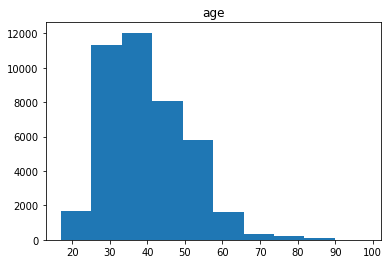

In [14]:
plt.hist(df["age"])
plt.title("age")
plt.show()

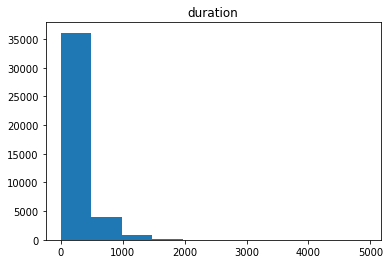

In [15]:
plt.hist(df["duration"])
plt.title("duration")
plt.show()

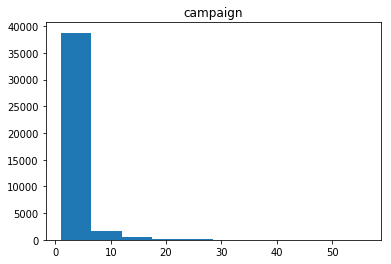

In [16]:
plt.hist(df["campaign"])
plt.title("campaign")
plt.show()

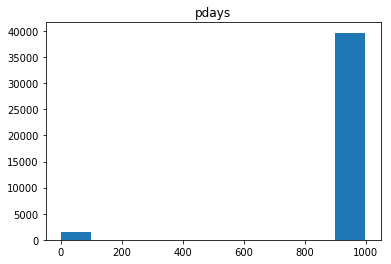

In [17]:
plt.hist(df["pdays"])
plt.title("pdays")
plt.show()

##### Most 'pdays' use 999 as default value. This feature can be dropped.
=====

In [18]:
df['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

##### 'poutcome' has too many 'nonexistent', this feature will be dropped
=====

In [19]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

##### Notice of the imbalance of data
======

## ITERATION ONE

## Preprocessing

### Feature Selection

In [20]:
#Select relavent features from dataframe
features_df = df[['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'duration','campaign', 'previous',
                  'emp.var.rate','cons.price.idx','euribor3m','nr.employed','y']]
features_df.head()


,age,job,marital,education,housing,loan,contact,duration,campaign,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,261,1,0,1.1,93.994,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,149,1,0,1.1,93.994,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,226,1,0,1.1,93.994,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,151,1,0,1.1,93.994,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,307,1,0,1.1,93.994,4.857,5191.0,no


### Data Cleaning

In [21]:
# Delete rows with 'unknown' data
features_df=features_df[features_df['job']!='unknown']
features_df=features_df[features_df['marital']!='unknown']
features_df=features_df[features_df['education']!='unknown']
features_df=features_df[features_df['housing']!='unknown']
features_df=features_df[features_df['loan']!='unknown']

# Test result to confirm drop of rows with 'unknown'
features_df['job'].value_counts()

admin.           9937
blue-collar      8560
technician       6380
services         3716
management       2728
retired          1577
entrepreneur     1360
self-employed    1349
housemaid         987
unemployed        963
student           688
Name: job, dtype: int64

In [22]:
# Test other results to confirm rows with 'unknown' are dropped completely
print (features_df['marital'].value_counts())
print (features_df['housing'].value_counts())

married     23183
single      10760
divorced     4302
Name: marital, dtype: int64
yes    20578
no     17667
Name: housing, dtype: int64


In [23]:
# check new data size
features_df.shape

(38245, 15)

In [24]:
# Check column names
features_df.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### Data Conversion from category to numeric

In [25]:
#Convert category data to numeric data
le_job = preprocessing.LabelEncoder()
le_job.fit(features_df['job'].unique())
features_df['job'] = le_job.transform(features_df['job'])

le_marital = preprocessing.LabelEncoder()
le_marital.fit(features_df['marital'].unique())
features_df['marital'] = le_marital.transform(features_df['marital'])

le_education = preprocessing.LabelEncoder()
le_education.fit(features_df['education'].unique())
features_df['education'] = le_education.transform(features_df['education'])

le_housing = preprocessing.LabelEncoder()
le_housing.fit(features_df['housing'].unique())
features_df['housing'] = le_housing.transform(features_df['housing'])

le_loan = preprocessing.LabelEncoder()
le_loan.fit(features_df['loan'].unique())
features_df['loan'] = le_loan.transform(features_df['loan'])

le_contact = preprocessing.LabelEncoder()
le_contact.fit(features_df['contact'].unique())
features_df['contact'] = le_contact.transform(features_df['contact'])

features_df.head()


,age,job,marital,education,housing,loan,contact,duration,campaign,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,1,261,1,0,1.1,93.994,4.857,5191.0,no
1,57,7,1,3,0,0,1,149,1,0,1.1,93.994,4.857,5191.0,no
2,37,7,1,3,1,0,1,226,1,0,1.1,93.994,4.857,5191.0,no
3,40,0,1,1,0,0,1,151,1,0,1.1,93.994,4.857,5191.0,no
4,56,7,1,3,0,1,1,307,1,0,1.1,93.994,4.857,5191.0,no


In [26]:
# Double-check conversion result
features_df['housing'].value_counts()

1    20578
0    17667
Name: housing, dtype: int64

### Conrrelation 

In [27]:
features_df.corr()

,age,job,marital,education,housing,loan,contact,duration,campaign,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed
age,1.000000,-0.001502,-0.393659,-0.150247,0.000291,-0.006390,0.005209,0.002405,0.005519,0.028479,-0.003563,-0.001236,0.007695,-0.021054
job,-0.001502,1.000000,0.019210,0.135696,0.005185,-0.012360,-0.027273,-0.006929,-0.006324,0.013135,-0.003343,-0.018548,-0.002658,-0.010924
marital,-0.393659,0.019210,1.000000,0.118855,0.009651,0.005221,-0.056921,0.004178,-0.006636,0.032242,-0.080152,-0.057781,-0.088133,-0.080803
education,-0.150247,0.135696,0.118855,1.000000,0.020530,0.011180,-0.118633,-0.017963,0.000443,0.032765,-0.043523,-0.097021,-0.034473,-0.034663
housing,0.000291,0.005185,0.009651,0.020530,1.000000,0.045077,-0.081830,-0.009104,-0.010817,0.020837,-0.060675,-0.080849,-0.059595,-0.046513
loan,-0.006390,-0.012360,0.005221,0.011180,0.045077,1.000000,-0.010330,0.000280,0.003914,-0.003268,0.002336,-0.003146,0.000317,0.004088
contact,0.005209,-0.027273,-0.056921,-0.118633,-0.081830,-0.010330,1.000000,-0.024191,0.079099,-0.209294,0.389324,0.592778,0.394629,0.263361
duration,0.002405,-0.006929,0.004178,-0.017963,-0.009104,0.000280,-0.024191,1.000000,-0.071110,0.016304,-0.025003,0.007530,-0.029029,-0.040722
campaign,0.005519,-0.006324,-0.006636,0.000443,-0.010817,0.003914,0.079099,-0.071110,1.000000,-0.078478,0.150752,0.128665,0.134783,0.143150
previous,0.028479,0.013135,0.032242,0.032765,0.020837,-0.003268,-0.209294,0.016304,-0.078478,1.000000,-0.419647,-0.208783,-0.450672,-0.494617


##### No multilinearity is found between features.
=====

### Prepare feature matrix

In [28]:
# Build feature matrix X
features=['age', 'job', 'marital', 'education', 'housing', 'loan','contact', 'duration','campaign',
       'previous','emp.var.rate','cons.price.idx','euribor3m','nr.employed']
X = features_df[features].values
X[0:3]

array([[5.6000e+01, 3.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 2.6100e+02, 1.0000e+00, 0.0000e+00,
        1.1000e+00, 9.3994e+01, 4.8570e+00, 5.1910e+03],
       [5.7000e+01, 7.0000e+00, 1.0000e+00, 3.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.4900e+02, 1.0000e+00, 0.0000e+00,
        1.1000e+00, 9.3994e+01, 4.8570e+00, 5.1910e+03],
       [3.7000e+01, 7.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 2.2600e+02, 1.0000e+00, 0.0000e+00,
        1.1000e+00, 9.3994e+01, 4.8570e+00, 5.1910e+03]])

### Prepare responce vector

In [29]:
# Build reasponse vector y
y=features_df['y'].values
y[0:5]

array(['no', 'no', 'no', 'no', 'no'], dtype=object)

### Normalization

In [30]:
# Preprocessing - normalizaion
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:3]

array([[ 1.56852703, -0.18358553, -0.27937595, -1.74878192, -1.07924533,
        -0.42961513,  1.33062908,  0.01074878, -0.56610584, -0.34897798,
         0.64954574,  0.73510905,  0.71303876,  0.32842297],
       [ 1.66571486,  0.94147615, -0.27937595, -0.29635844, -1.07924533,
        -0.42961513,  1.33062908, -0.42036992, -0.56610584, -0.34897798,
         0.64954574,  0.73510905,  0.71303876,  0.32842297],
       [-0.27804183,  0.94147615, -0.27937595, -0.29635844,  0.92657339,
        -0.42961513,  1.33062908, -0.12397581, -0.56610584, -0.34897798,
         0.64954574,  0.73510905,  0.71303876,  0.32842297]])

## Modeling

### Split training and test data

In [31]:
# Modeling - Split dataset to training data and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (30596, 14) (30596,)
Test set: (7649, 14) (7649,)


### Logistic Regression - LR

In [32]:
# Modeling - Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
print('LR: ', LR)

LR:  LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)


In [33]:
myarray=[]
fea=np.asarray(features)
myarray=np.append(LR.coef_.transpose(),np.vstack(fea),axis=1)
print('Coefficients: \n',myarray)

Coefficients: 
 [['0.08877559269896103' 'age']
 ['0.03885583278457843' 'job']
 ['0.06720428589870893' 'marital']
 ['0.15073836013898387' 'education']
 ['-0.0060387236386783534' 'housing']
 ['-0.01723876331647282' 'loan']
 ['-0.24249027569138357' 'contact']
 ['1.0368976390992644' 'duration']
 ['-0.0755299287669983' 'campaign']
 ['0.0774582696407493' 'previous']
 ['-0.5233466928147501' 'emp.var.rate']
 ['0.17830378041001232' 'cons.price.idx']
 ['0.28144231220072646' 'euribor3m']
 ['-0.7653919804175112' 'nr.employed']]


## ITERATION TWO -  FEATURE REDUCTION

#### The 'duration' feature is highly correlated to the outcome with the highest coeficent (1.04). However, since the duration of the call is not known during precition, it should be dropped when building prediction model. Once the call is made and the duration is known, it can be used for benchmark with prediction.

In [34]:
# Preprocessing
# Rebuild feature matrix X dropping 'duration'
features=['age', 'job', 'marital', 'education', 'housing', 'loan','contact', 'campaign',
       'previous','emp.var.rate','cons.price.idx','euribor3m','nr.employed']
X = features_df[features].values
X[0:3]

array([[5.6000e+01, 3.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.1000e+00,
        9.3994e+01, 4.8570e+00, 5.1910e+03],
       [5.7000e+01, 7.0000e+00, 1.0000e+00, 3.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.1000e+00,
        9.3994e+01, 4.8570e+00, 5.1910e+03],
       [3.7000e+01, 7.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.1000e+00,
        9.3994e+01, 4.8570e+00, 5.1910e+03]])

In [35]:
# Preprocessing - normalizaion
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:3]

array([[ 1.56852703, -0.18358553, -0.27937595, -1.74878192, -1.07924533,
        -0.42961513,  1.33062908, -0.56610584, -0.34897798,  0.64954574,
         0.73510905,  0.71303876,  0.32842297],
       [ 1.66571486,  0.94147615, -0.27937595, -0.29635844, -1.07924533,
        -0.42961513,  1.33062908, -0.56610584, -0.34897798,  0.64954574,
         0.73510905,  0.71303876,  0.32842297],
       [-0.27804183,  0.94147615, -0.27937595, -0.29635844,  0.92657339,
        -0.42961513,  1.33062908, -0.56610584, -0.34897798,  0.64954574,
         0.73510905,  0.71303876,  0.32842297]])

In [36]:
# Modeling - Split dataset to training data and test data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (30596, 13) (30596,)
Test set: (7649, 13) (7649,)


In [37]:
# Modeling - Logistic Regression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
print('LR: ', LR)

myarray=[]
fea=np.asarray(features)
myarray=np.append(LR.coef_.transpose(),np.vstack(fea),axis=1)
print('Coefficients: \n',myarray)


LR:  LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)
Coefficients: 
 [['0.0804384010650379' 'age']
 ['0.02710731055911906' 'job']
 ['0.05254675288238117' 'marital']
 ['0.1056261329953241' 'education']
 ['-0.0169883645945662' 'housing']
 ['-0.011343881285392486' 'loan']
 ['-0.2845223862209782' 'contact']
 ['-0.10330907691658837' 'campaign']
 ['0.06190946794482432' 'previous']
 ['-0.5017805123305146' 'emp.var.rate']
 ['0.23400548488546138' 'cons.price.idx']
 ['0.3284072622204078' 'euribor3m']
 ['-0.6923956181930065' 'nr.employed']]


In [38]:
# Prediction
yhat = LR.predict(X_test)
yhat[0:5]

array(['no', 'no', 'no', 'no', 'no'], dtype=object)

# Evaluation

#### Similarity Score

In [39]:
# Calculate the similarity score between the model prediction and the actural result
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.8946267485945876

#### Confusion Matrix

In [40]:
# Use confusion matrix to check accuracy of the prediction
# First define a function for plotting confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[  94  740]
 [  66 6749]]


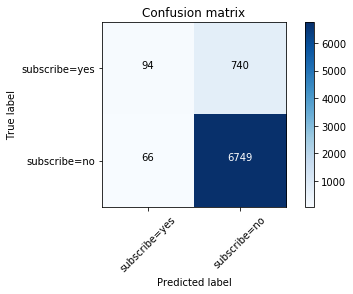

In [41]:
# Plot non-normalized confusion matrix
cnf_mat=confusion_matrix(y_test, yhat, labels=['yes','no'])
plt.figure()
plot_confusion_matrix(cnf_mat, classes=['subscribe=yes','subscribe=no'],normalize= False,  title='Confusion matrix')

#### Probability Prediction

In [42]:
# Predicting probability of class = 0: no_subscribe
yhat_prob = LR.predict_proba(X_test)
yhat_prob[0:5]

array([[0.95772074, 0.04227926],
       [0.92601755, 0.07398245],
       [0.92508374, 0.07491626],
       [0.83564063, 0.16435937],
       [0.95815162, 0.04184838]])

#### Log Loss

In [43]:
from sklearn.metrics import log_loss
print('Log loss: ', log_loss(y_test, yhat_prob))

Log loss:  0.283540483049856


In [44]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94      6815
         yes       0.59      0.11      0.19       834

   micro avg       0.89      0.89      0.89      7649
   macro avg       0.74      0.55      0.57      7649
weighted avg       0.87      0.89      0.86      7649



##### The F1-score for 'yes' is very low
=====

## Improving prediction of 'yes' with undersampling
#### Although the similarity score is high (0.89), the 'true-positive' prediction was very low (94/834). In another word, too much false negative. This might  be due to the imbalance of classes. Since we do not want to miss prediction of potential subscribers, we will invest further to refine our model to reduce false negative.

In [45]:
#Check imbalance of outcome
np.unique(y_train, return_counts=True)

(array(['no', 'yes'], dtype=object), array([27172,  3424]))

##### Outcome 'y' is very imbalanced, with 27172 'no' and only 3424 'yes'
=====

## ITERATION THREE

## Undersampling of majority class

In [46]:
# The training data is very imbalanced with much more 'no's than 'yes's
# we will undersample 'no's to rebalance training data

# First concatenate training data back together
X_new=np.column_stack((X_train, y_train))
X_new[0:3]


array([[-1.05554450429166, 1.504006991585692, 1.375119769359303,
        1.15606503451636, 0.9265733887433735, -0.4296151337007942,
        -0.7515242343183673, -0.5661058387202299, -0.3489779782128322,
        -1.9048560583752383, -1.910810711274577, -1.4820792663974103,
        -1.2713675618613698, 'no'],
       [0.985400020159377, -1.0273817948067208, -0.27937595465197657,
        -0.7804996032602679, -1.0792453270821951, -0.4296151337007942,
        -0.7515242343183673, 1.2406199487737364, -0.3489779782128322,
        -1.202395564177621, -1.175158266534083, -1.327184155460759,
        -0.952245582376561, 'no'],
       [-0.375229662807981, 0.09767988803435165, -0.27937595465197657,
        1.15606503451636, -1.0792453270821951, -0.4296151337007942,
        -0.7515242343183673, -0.20476068122143667, 1.7037231563226596,
        -0.11677480041766677, -0.6425042558375079, 0.26164666530362224,
        0.39531316942170125, 'no']], dtype=object)

In [47]:
# separate minority and majority classes
no_subscribe = X_new[X_new[:,13]=='no']
subscribe = X_new[X_new[:,13]=='yes']

In [48]:
# Downsample majority to equal to minority
from sklearn.utils import resample
no_subscribe_downsampled = resample(no_subscribe,
                                replace = False,
                                n_samples = len(subscribe), # match minority length
                                random_state = 4)

# combine minority and downsampled majority
downsampled = np.concatenate((no_subscribe_downsampled, subscribe), axis=0)

# checking counts
downsampled_ct=np.unique(downsampled[:,13], return_counts=True)
downsampled_ct


(array(['no', 'yes'], dtype=object), array([3424, 3424]))

#### Define downsampled training data

In [49]:
# Use downsample data set as new training data
XX_train=downsampled[:,0:13]
XX_train[0:3]

array([[1.8600905306383928, 0.37894530874461974, -0.27937595465197657,
        -1.7487819221485819, 0.9265733887433735, -0.4296151337007942,
        1.330629079323038, 0.15658447627735658, -0.3489779782128322,
        0.841125873488175, 1.552307872928393, 0.7725693446618296,
        0.845428450529087],
       [0.5966486821687033, 0.6602107294548878, -1.933871678663256,
        -0.7804996032602679, -1.0792453270821951, -0.4296151337007942,
        -0.7515242343183673, -0.5661058387202299, -0.3489779782128322,
        -0.11677480041766677, -0.6425042558375079, 0.26164666530362224,
        0.39531316942170125],
       [-1.1527323387893285, -0.7461163740964526, -0.27937595465197657,
        -0.7804996032602679, 0.9265733887433735, -0.4296151337007942,
        -0.7515242343183673, -0.20476068122143667, -0.3489779782128322,
        -1.202395564177621, -1.175158266534083, -1.3433672267526482,
        -0.952245582376561]], dtype=object)

In [50]:
yy_train=downsampled[:,13]
yy_train[0:5]

array(['no', 'no', 'no', 'no', 'no'], dtype=object)

## Modeling - LR2 (using downsampled training data)

In [51]:
# Modeling - LR2
LR2 = LogisticRegression(C=0.01, solver='liblinear').fit(XX_train,yy_train)
print('LR2: ', LR2)
myarray=[]
fea=np.asarray(features)
myarray=np.append(LR2.coef_.transpose(),np.vstack(fea),axis=1)
print('Coefficients: \n', myarray)


LR2:  LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)
Coefficients: 
 [['0.09520409399839191' 'age']
 ['0.027318967407053862' 'job']
 ['0.07891339039402787' 'marital']
 ['0.12939174783090618' 'education']
 ['-0.02424751915956119' 'housing']
 ['-0.0362201015640216' 'loan']
 ['-0.2646411849557297' 'contact']
 ['-0.1075964237317929' 'campaign']
 ['0.07878265337473209' 'previous']
 ['-0.3598760687785813' 'emp.var.rate']
 ['0.21944616987444027' 'cons.price.idx']
 ['0.0770261170291765' 'euribor3m']
 ['-0.5269003814970219' 'nr.employed']]


## Prediction

In [52]:
# Prediction
yyhat = LR2.predict(X_test)
yyhat[0:5]

array(['no', 'no', 'no', 'yes', 'no'], dtype=object)

## Evaluation

#### Similarity Score

In [53]:
# Calculate the accuracy score of the model prediction 
jaccard_similarity_score(y_test, yyhat)

0.7385279121453785

#### Confusion matrix

Confusion matrix, without normalization
[[ 595  239]
 [1761 5054]]


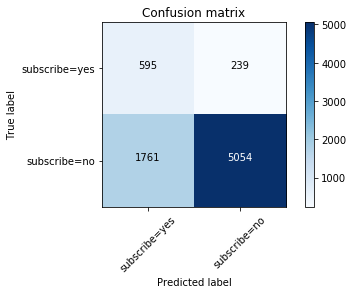

In [54]:
# Use confusion matrix to check accuracy of the prediction
# Plot non-normalized confusion matrix
cnf_mat=confusion_matrix(y_test, yyhat, labels=['yes','no'])
plt.figure()
plot_confusion_matrix(cnf_mat, classes=['subscribe=yes','subscribe=no'],normalize= False,  title='Confusion matrix')

#### Probability

In [55]:
# Predicting probability ['no','yes']
yyhat_prob = LR2.predict_proba(X_test)
yyhat_prob[0:5]

array([[0.74750563, 0.25249437],
       [0.60949353, 0.39050647],
       [0.61200023, 0.38799977],
       [0.41731084, 0.58268916],
       [0.75851762, 0.24148238]])

#### Log loss

In [56]:
log_loss(y_test, yyhat_prob)

0.5620712033856957

In [57]:
print (classification_report(y_test, yyhat))

              precision    recall  f1-score   support

          no       0.95      0.74      0.83      6815
         yes       0.25      0.71      0.37       834

   micro avg       0.74      0.74      0.74      7649
   macro avg       0.60      0.73      0.60      7649
weighted avg       0.88      0.74      0.78      7649



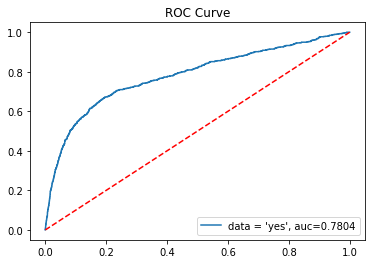

In [58]:
# Plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,  yyhat_prob[:,1],pos_label='yes')
auc = metrics.roc_auc_score(y_test, yyhat_prob[:,1])
plt.plot(fpr,tpr,label="data = 'yes', auc="+str(round(auc,4)))
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()

In [59]:
np.unique(y_test,return_counts=True)

(array(['no', 'yes'], dtype=object), array([6815,  834]))

###  Result:  'yes' prediction was improved
##### Although LR2 (using the undersampling method) produced lower similarity score (0.73 vs. 0.89) with higher log loss compared to LR, it increase the accuracy of predicting subscriber (595/834 vs 94/834). Under time constraint, reducing false negative is the main goal for this data modeling exercise. From a business point of view, we do not want to miss the prediction of a potential subscriber (customer). So the second model LR2 (using undersampling) improved the prediction result. 
=====


## ITERATION FOUR

## Investigate if there is overfitting in the model

In [60]:
# First test accuracy using training data
yyhat_train=LR2.predict(XX_train)
yyhat_train[0:5]

array(['no', 'no', 'yes', 'no', 'no'], dtype=object)

Confusion matrix, without normalization
[[2369 1055]
 [ 969 2455]]


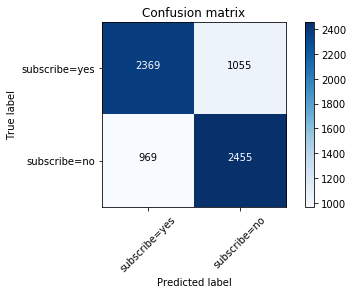

In [61]:
cnf_mat=confusion_matrix(yy_train, yyhat_train, labels=['yes','no'])
plt.figure()
plot_confusion_matrix(cnf_mat, classes=['subscribe=yes','subscribe=no'],normalize= False,  title='Confusion matrix')

In [62]:
print (classification_report(yy_train, yyhat_train))

              precision    recall  f1-score   support

          no       0.70      0.72      0.71      3424
         yes       0.71      0.69      0.70      3424

   micro avg       0.70      0.70      0.70      6848
   macro avg       0.70      0.70      0.70      6848
weighted avg       0.70      0.70      0.70      6848



##### Overall precision is improved. However there is no observation of higher accuracy of predicting 'True Positive' by using training data. This can be an indicator that there is no overfitting issue. However, we can complete the investigation by reducing low-impact features.

#### Further feature reduction

In [63]:
print('Coefficients: \n',myarray)

Coefficients: 
 [['0.09520409399839191' 'age']
 ['0.027318967407053862' 'job']
 ['0.07891339039402787' 'marital']
 ['0.12939174783090618' 'education']
 ['-0.02424751915956119' 'housing']
 ['-0.0362201015640216' 'loan']
 ['-0.2646411849557297' 'contact']
 ['-0.1075964237317929' 'campaign']
 ['0.07878265337473209' 'previous']
 ['-0.3598760687785813' 'emp.var.rate']
 ['0.21944616987444027' 'cons.price.idx']
 ['0.0770261170291765' 'euribor3m']
 ['-0.5269003814970219' 'nr.employed']]


In [64]:
#'housing', 'loan', 'euribor3m' have very low coefficent. They can be dropped from the list of features. 
# Furthermore, We can keep only first 5 features with the highest conefficent.
X = features_df[['education', 'contact','campaign',
       'emp.var.rate','nr.employed']].values  # reduce features
X = preprocessing.StandardScaler().fit(X).transform(X)  #Normalize
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)  # Train-Test split
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (30596, 5) (30596,)
Test set: (7649, 5) (7649,)


In [65]:
# Undersampling
X_new=np.column_stack((X_train, y_train))
no_subscribe = X_new[X_new[:,5]=='no']
subscribe = X_new[X_new[:,5]=='yes']
no_subscribe_downsampled = resample(no_subscribe,
                                replace = False,
                                n_samples = len(subscribe), # match minority length
                                random_state = 4)

# combine minority and downsampled majority
downsampled = np.concatenate((no_subscribe_downsampled, subscribe), axis=0)

# checking counts
downsampled_ct=np.unique(downsampled[:,5], return_counts=True)
downsampled_ct

(array(['no', 'yes'], dtype=object), array([3424, 3424]))

In [66]:
# Use downsample data set as new training data
XX_train=downsampled[:,0:5]
yy_train=downsampled[:,5]

### Modeling - LR3

In [67]:
# Modeling - LR3
LR3 = LogisticRegression(C=0.01, solver='liblinear').fit(XX_train,yy_train)
print('LR3: ', LR3)
print('Coefficient: ', LR3.coef_)

LR3:  LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)
Coefficient:  [[ 0.11801156 -0.20999016 -0.10771009 -0.0726165  -0.66671687]]


In [68]:
# Prediction
yyhat3 = LR3.predict(X_test)
yyhat3[0:5]

array(['no', 'no', 'no', 'yes', 'no'], dtype=object)

In [69]:
# Predicting probability ['no','yes']
yyhat3_prob = LR3.predict_proba(X_test)
yyhat3_prob[0:5]

array([[0.77671956, 0.22328044],
       [0.65841302, 0.34158698],
       [0.65841302, 0.34158698],
       [0.37787129, 0.62212871],
       [0.78339665, 0.21660335]])

In [70]:
# Calculate the accuracy score of the model prediction 
jaccard_similarity_score(y_test, yyhat3)

0.7318603739050856

Confusion matrix, without normalization
[[ 598  236]
 [1815 5000]]


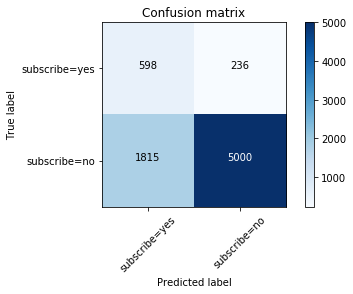

In [71]:
# Use confusion matrix to check accuracy of the prediction
# Plot non-normalized confusion matrix
cnf_mat=confusion_matrix(y_test, yyhat3, labels=['yes','no'])
plt.figure()
plot_confusion_matrix(cnf_mat, classes=['subscribe=yes','subscribe=no'],normalize= False,  title='Confusion matrix')

In [72]:
print (classification_report(y_test, yyhat3))

              precision    recall  f1-score   support

          no       0.95      0.73      0.83      6815
         yes       0.25      0.72      0.37       834

   micro avg       0.73      0.73      0.73      7649
   macro avg       0.60      0.73      0.60      7649
weighted avg       0.88      0.73      0.78      7649



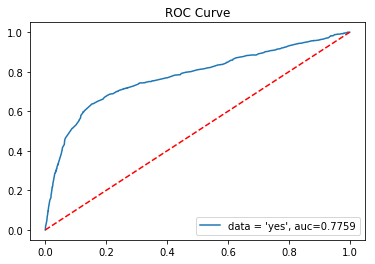

In [73]:
# Plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,  yyhat3_prob[:,1],pos_label='yes')
auc = metrics.roc_auc_score(y_test, yyhat3_prob[:,1])
plt.plot(fpr,tpr,label="data = 'yes', auc="+str(round(auc,4)))
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()

##### Result: Feature reduction improved prediction accuracy of 'yes' only slightly (slight increase of recall). So the issue is not overfitting of training data. We could further improve the accuracy of the model by choosing a different classification algorithm such as Decision Tree or SVM. We could also test the result using oversampling. However,  this exercise is to demonstrate my ability to explore unknow dataset using data science methodology. Due to time constraint, no further investigate will be made to improve the model at this point.
=====

### Conclusion: In this exercise,  a prediction model was built for a Bank Marketing Campaign dataset using Logistic Regression. The goal was to predict if a customer will subscribe to the bank term deposit ('yes'). Initial iteration yielded poor result on prediction of 'yes'. The hypothesis was that the imalance of training data was a major cause. There are overwhelmingly more 'no's in the training set.  Undersampling was then performed and showed large improvement on 'yes' prediction outcome;  feature reduction was also investigated but did not show any improvement. The result also shows that amongst the social and ecomonical indicators, number of employees has highest correlation to the outcome. For future investigation different classification algorithms can be tested to improve prediction accuracy. 